# Laboratorio 1
### 21016 Javier Chavez
### 21085 Andres Quezada

In [47]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# !pip install ydata_profiling
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [ ]:
data = "/content/sample_data/risk_factors_cervical_cancer.csv"
df = pd.read_csv(data)

## 1. Realice una exploración rápida de sus datos. Puede usar alguna forma automatizada de hacer análisis exploratorio siempre y cuando explique los resultados que arrojan los módulos/paquetes

In [ ]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
rows, cols = df.shape
print(f"Rows: {rows}\nColumns: {cols}")

Rows: 858
Columns: 36


In [ ]:
profile = ProfileReport(df, title='Laboratorio 1', explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Resultados análisis exploratorio
- El dataset tiene 858 filas y 36 columnas
- El Profiler encontró 20 filas duplicadas, lo que representa 2% del dataset
- Hay celdas con valores faltantes representadas por ?
- La mayoría de variables están desequilibradas, lo que puede afectar el modelo.

### Información adicional sobre variables
- (int) Age
- (int) Number of sexual partners
- (int) First sexual intercourse (age)
- (int) Num of pregnancies
- (bool) Smokes
- (bool) Smokes (years)
- (bool) Smokes (packs/year)
- (bool) Hormonal Contraceptives
- (int) Hormonal Contraceptives (years)
- (bool) IUD
- (int) IUD (years)
- (bool) STDs
- (int) STDs (number)
- (bool) STDs:condylomatosis
- (bool) STDs:cervical condylomatosis
- (bool) STDs:vaginal condylomatosis
- (bool) STDs:vulvo-perineal condylomatosis
- (bool) STDs:syphilis
- (bool) STDs:pelvic inflammatory disease
- (bool) STDs:genital herpes
- (bool) STDs:molluscum contagiosum
- (bool) STDs:AIDS
- (bool) STDs:HIV
- (bool) STDs:Hepatitis B
- (bool) STDs:HPV
- (int) STDs: Number of diagnosis
- (int) STDs: Time since first diagnosis
- (int) STDs: Time since last diagnosis
- (bool) Dx:Cancer
- (bool) Dx:CIN
- (bool) Dx:HPV
- (bool) Dx
- (bool) Hinselmann: target variable
- (bool) Schiller: target variable
- (bool) Cytology: target variable
- (bool) Biopsy: target variable


## 2. Indique el tipo de cada una de las variables del conjunto de datos (cualitativa o categórica, cuantitativa continua, cuantitativa discreta)

1. **Age**: Cuantitativa continua
2. **Number of sexual partners**: Cuantitativa discreta
3. **First sexual intercourse (age)**: Cuantitativa continua
4. **Num of pregnancies**: Cuantitativa discreta
5. **Smokes**: Cualitativa (categórica binaria)
6. **Smokes (years)**: Cuantitativa continua
7. **Smokes (packs/year)**: Cuantitativa continua
8. **Hormonal Contraceptives**: Cualitativa (categórica binaria)
9. **Hormonal Contraceptives (years)**: Cuantitativa continua
10. **IUD**: Cualitativa (categórica binaria)
11. **IUD (years)**: Cuantitativa continua
12. **STDs**: Cualitativa (categórica binaria)
13. **STDs (number)**: Cuantitativa discreta
14. **STDs:condylomatosis**: Cualitativa (categórica binaria)
15. **STDs:cervical condylomatosis**: Cualitativa (categórica binaria)
16. **STDs:vaginal condylomatosis**: Cualitativa (categórica binaria)
17. **STDs:vulvo-perineal condylomatosis**: Cualitativa (categórica binaria)
18. **STDs:syphilis**: Cualitativa (categórica binaria)
19. **STDs:pelvic inflammatory disease**: Cualitativa (categórica binaria)
20. **STDs:genital herpes**: Cualitativa (categórica binaria)
21. **STDs:molluscum contagiosum**: Cualitativa (categórica binaria)
22. **STDs:AIDS**: Cualitativa (categórica binaria)
23. **STDs:HIV**: Cualitativa (categórica binaria)
24. **STDs:Hepatitis B**: Cualitativa (categórica binaria)
25. **STDs:HPV**: Cualitativa (categórica binaria)
26. **STDs: Number of diagnosis**: Cuantitativa discreta
27. **STDs: Time since first diagnosis**: Cuantitativa continua
28. **STDs: Time since last diagnosis**: Cuantitativa continua
29. **Dx:Cancer**: Cualitativa (categórica binaria)
30. **Dx:CIN**: Cualitativa (categórica binaria)
31. **Dx:HPV**: Cualitativa (categórica binaria)
32. **Dx**: Cualitativa (categórica binaria)
33. **Hinselmann: target variable**: Cualitativa (categórica binaria)
34. **Schiller: target variable**: Cualitativa (categórica binaria)
35. **Cytology: target variable**: Cualitativa (categórica binaria)
36. **Biopsy: target variable**: Cualitativa (categórica binaria)


In [22]:
df = df.replace('?', None)
df = df.dropna(thresh=0.1*df.shape[0], axis=1)
df = df.apply(pd.to_numeric, errors='ignore')
df.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

## 3. Incluya los gráficos exploratorios, siendo consecuentes con el tipo de variable que están representando

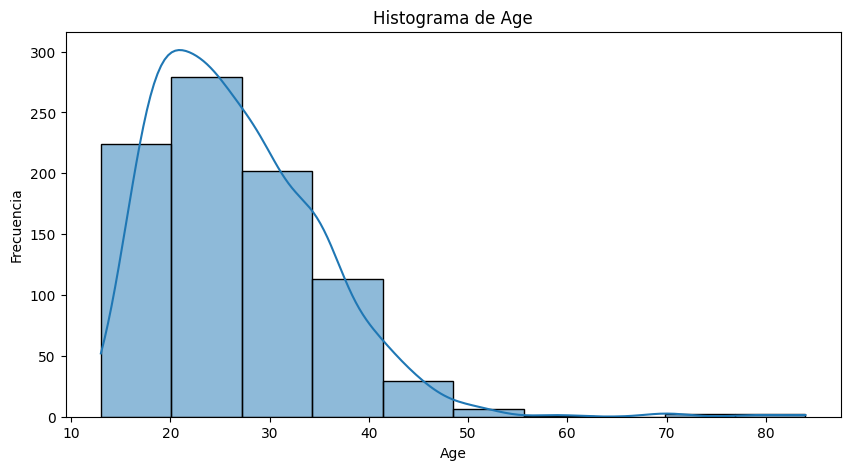

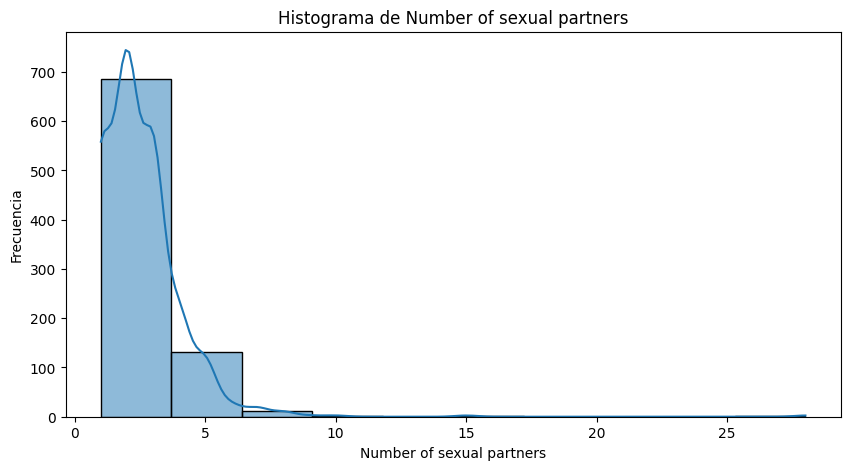

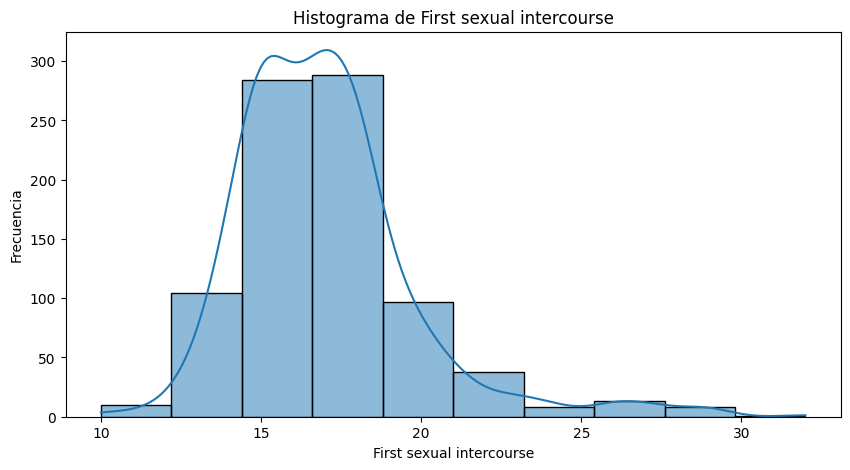

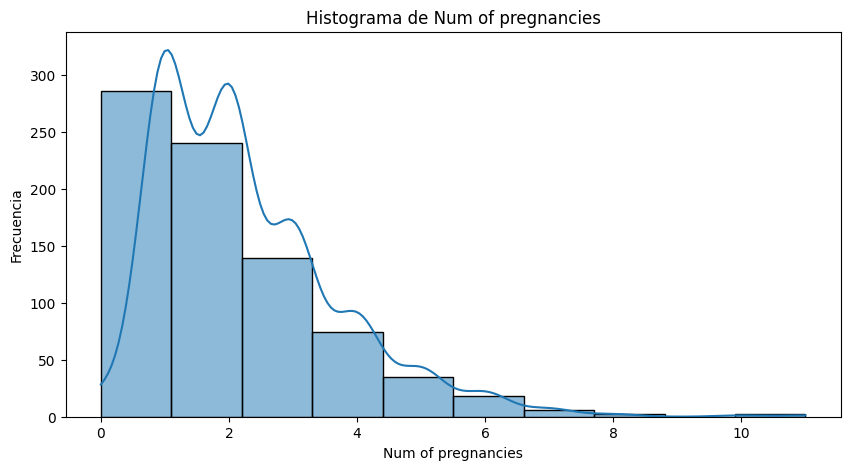

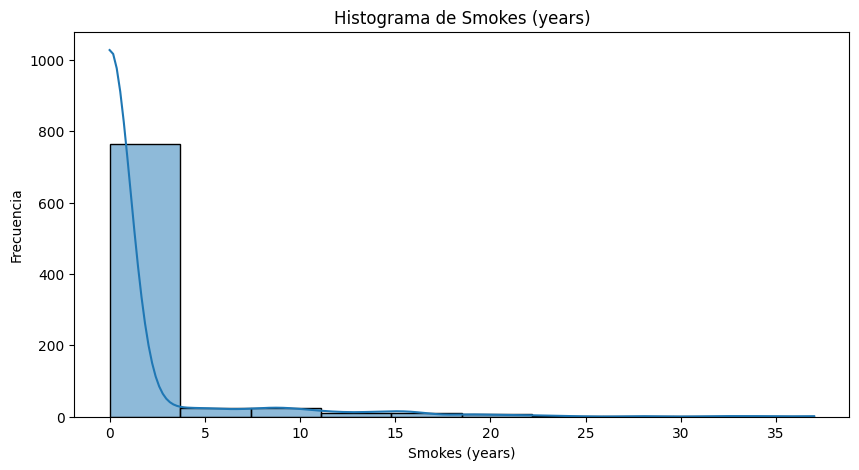

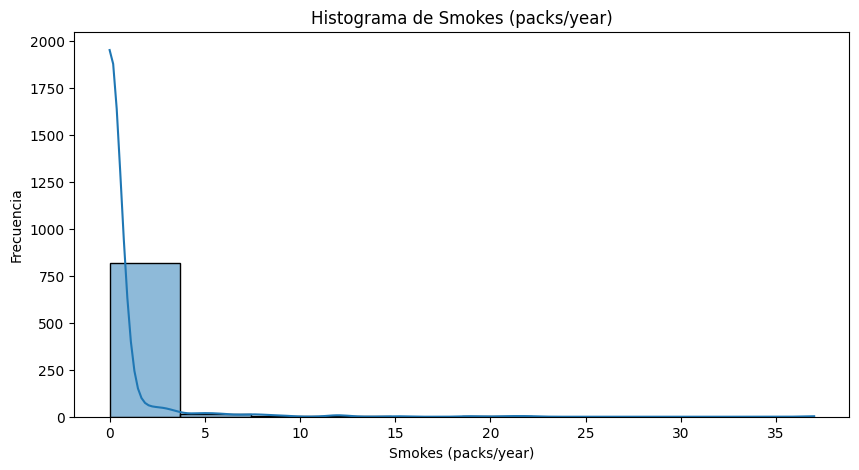

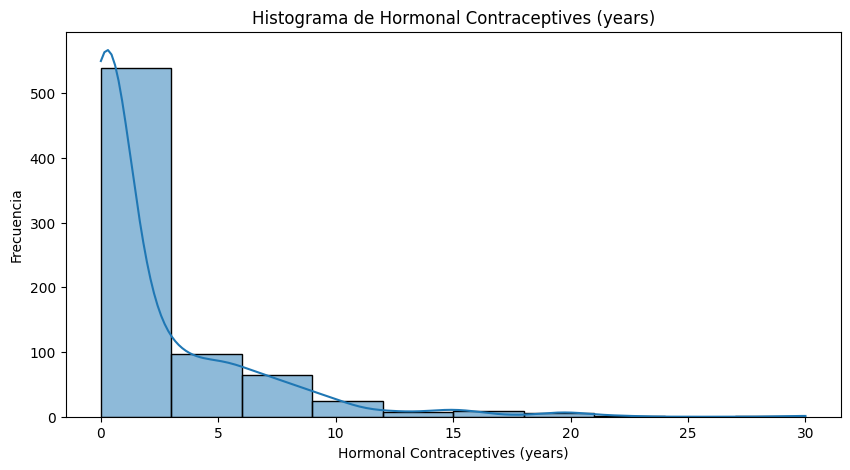

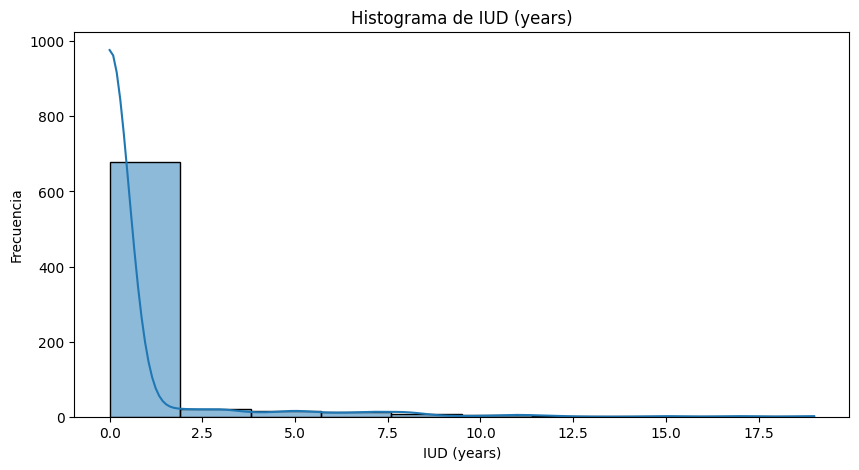

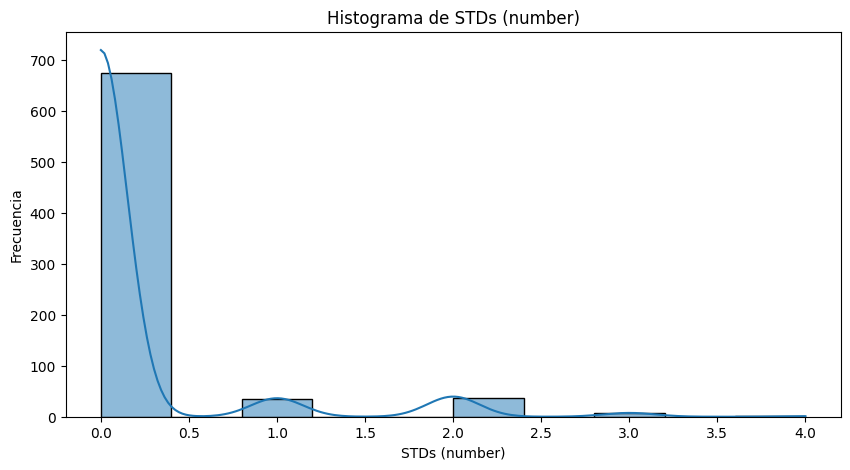

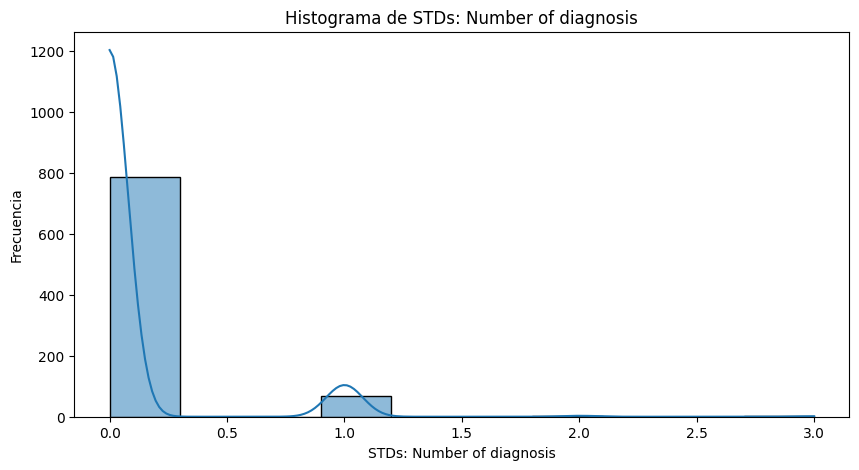

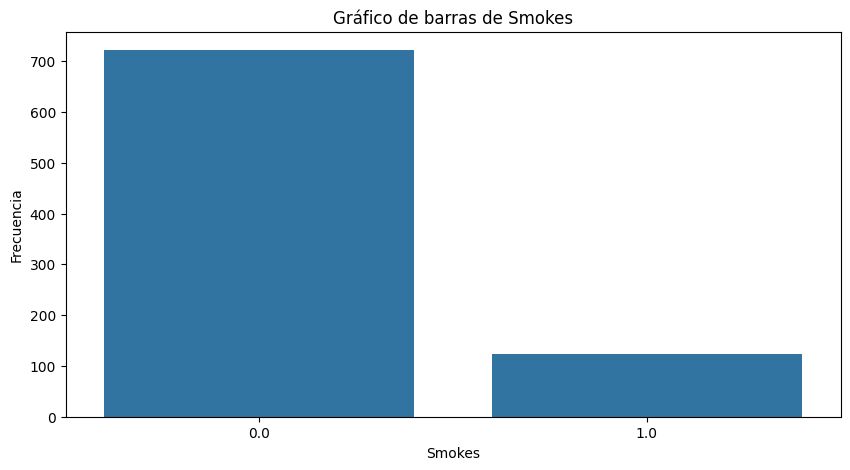

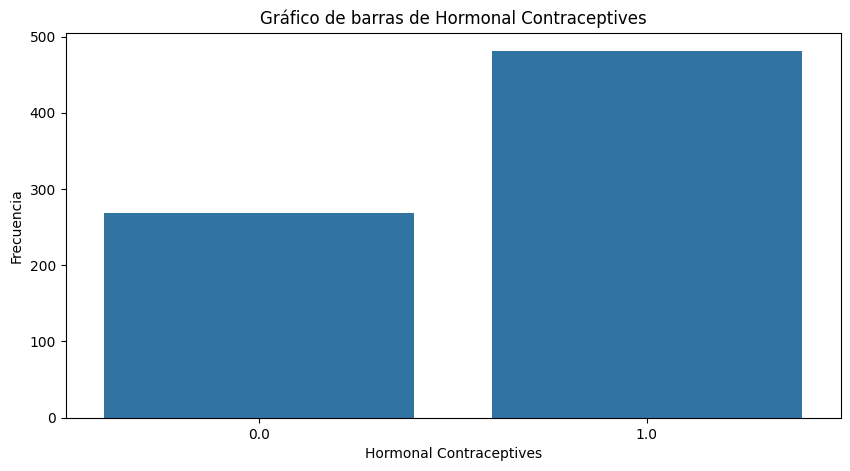

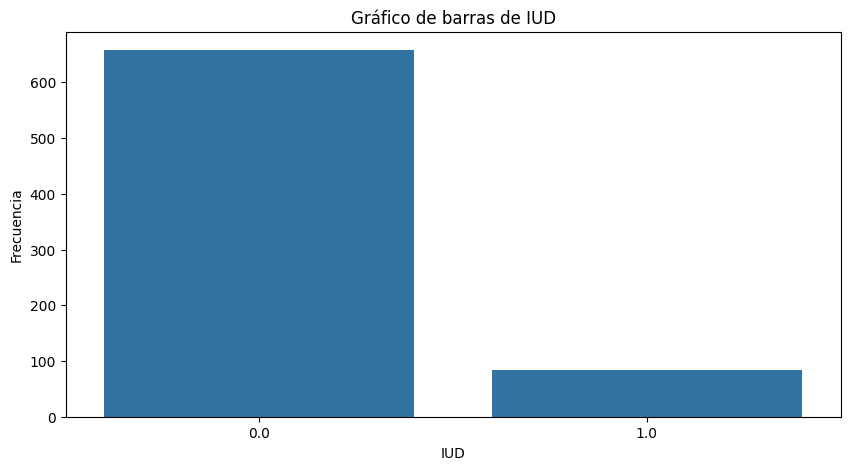

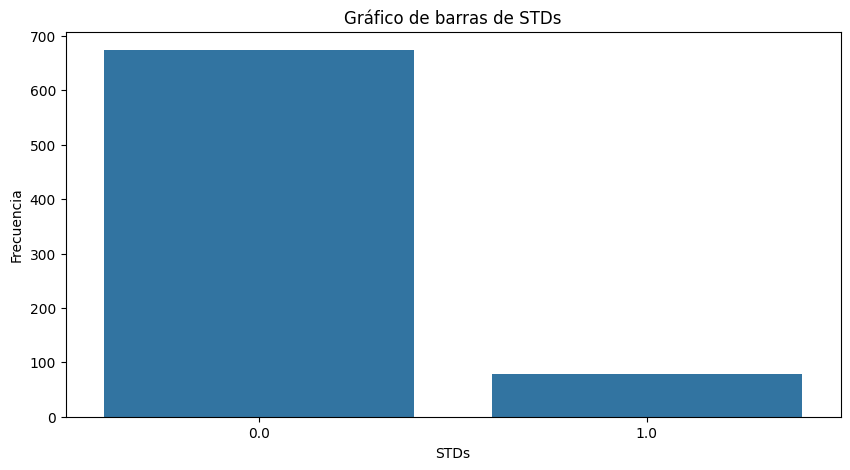

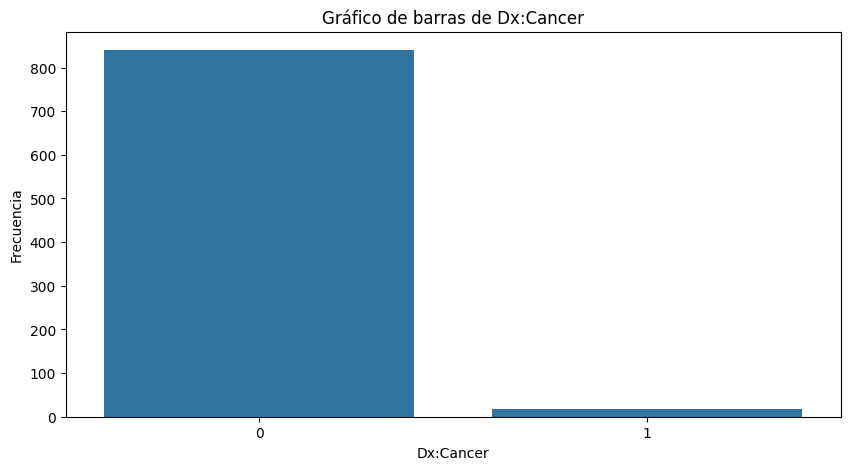

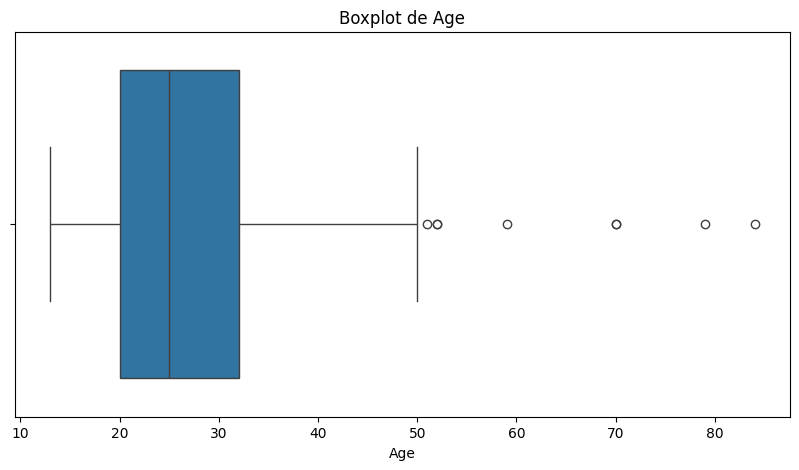

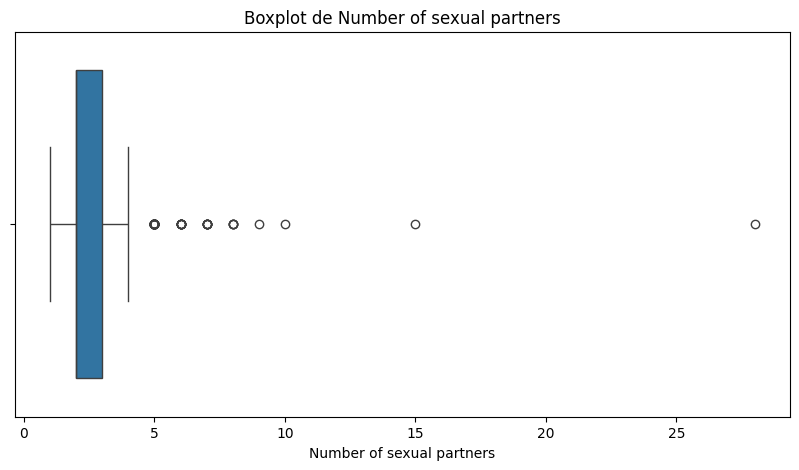

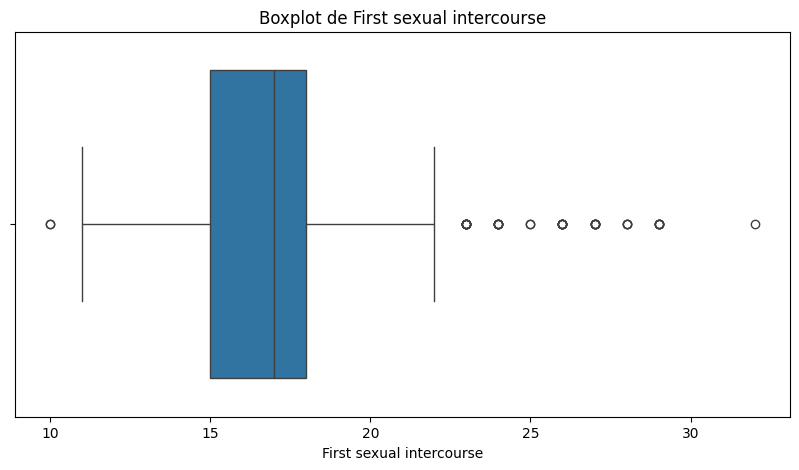

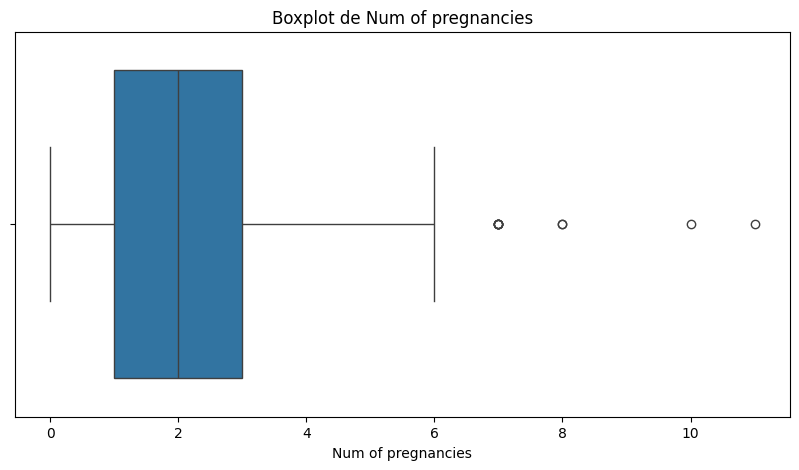

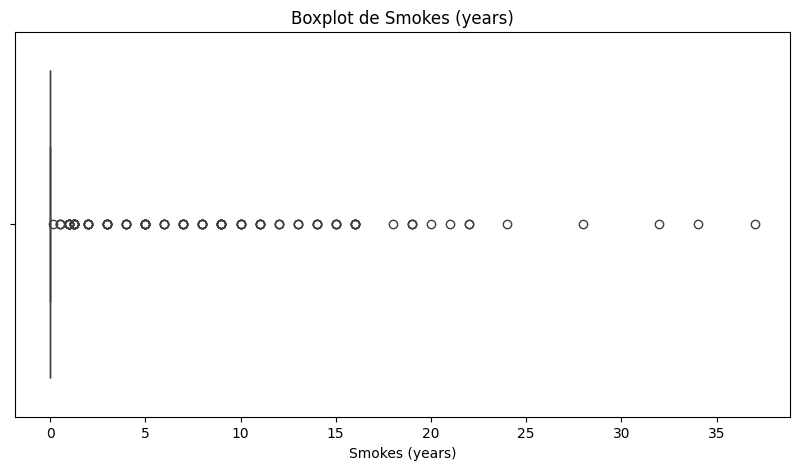

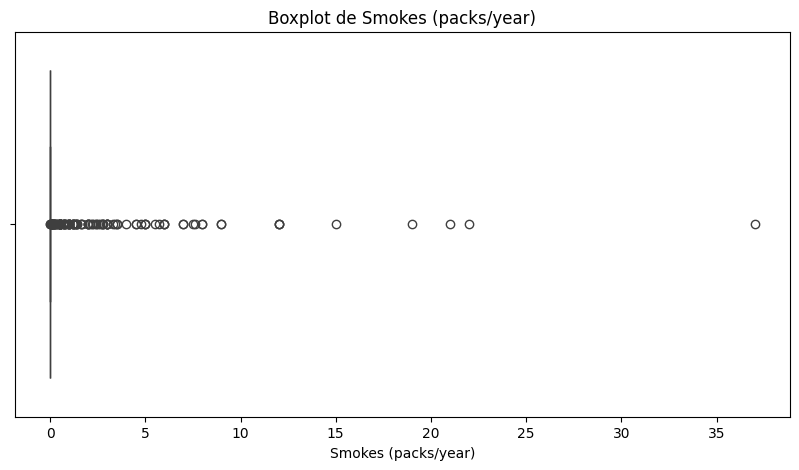

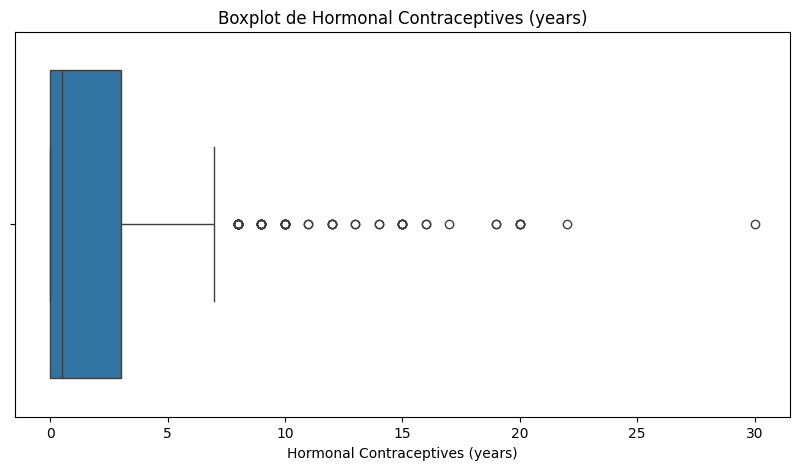

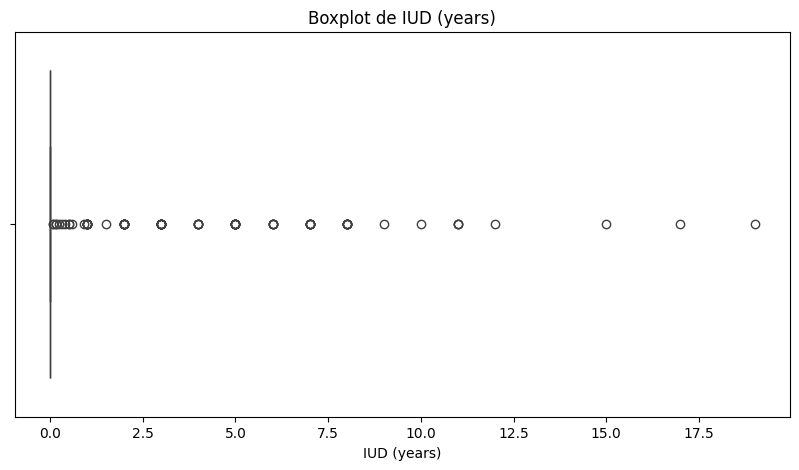

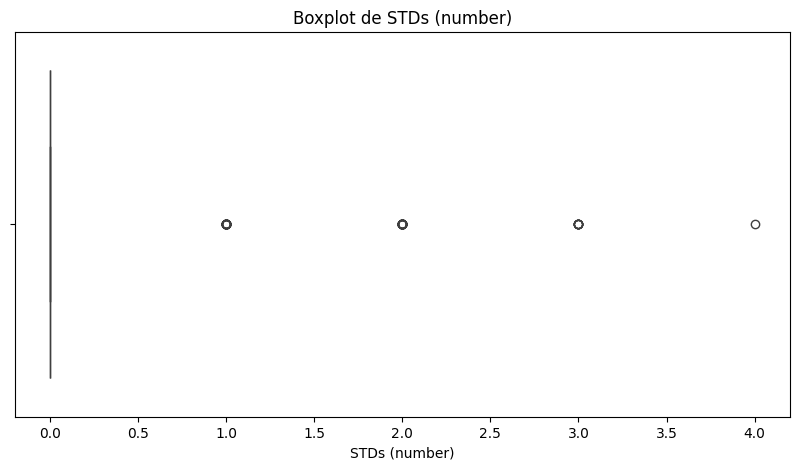

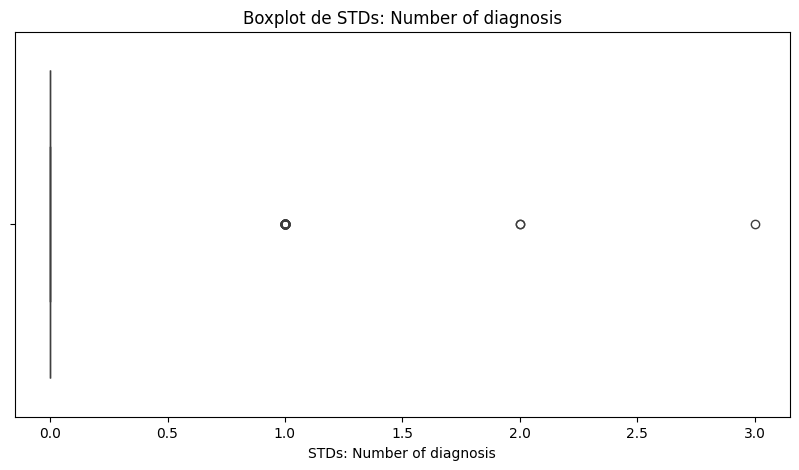

In [34]:
# Variables cuantitativas
quantitative_vars = ["Age", "Number of sexual partners", "First sexual intercourse",
                     "Num of pregnancies", "Smokes (years)", "Smokes (packs/year)",
                     "Hormonal Contraceptives (years)", "IUD (years)", "STDs (number)",
                     "STDs: Number of diagnosis"]

# Variables cualitativas
qualitative_vars = [
    'Smokes', 'Hormonal Contraceptives',
    'IUD', 'STDs', 'Dx:Cancer']

# Histogramas para variables cuantitativas
for var in quantitative_vars:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[var], kde=True, bins=10)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

# Gráficos de barras para variables cualitativas
for var in qualitative_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[var])
    plt.title(f'Gráfico de barras de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

# Boxplots para variables cuantitativas
for var in quantitative_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.show()

## 4. Aísle las variables numéricas de las categóricas, realice un análisis de correlación entre las mismas.

In [33]:
# Variables numéricas
quantitative_vars = ["Age", "Number of sexual partners", "First sexual intercourse",
                     "Num of pregnancies", "Smokes (years)", "Smokes (packs/year)",
                     "Hormonal Contraceptives (years)", "IUD (years)", "STDs (number)",
                     "STDs: Number of diagnosis"]

df[quantitative_vars].describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,750.000000,741.000000,753.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,1.219721,0.453144,2.256419,0.514804,0.176627,0.087413
std,8.497948,1.667760,2.803355,1.447414,4.089017,2.226610,3.764254,1.943089,0.561993,0.302545
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000


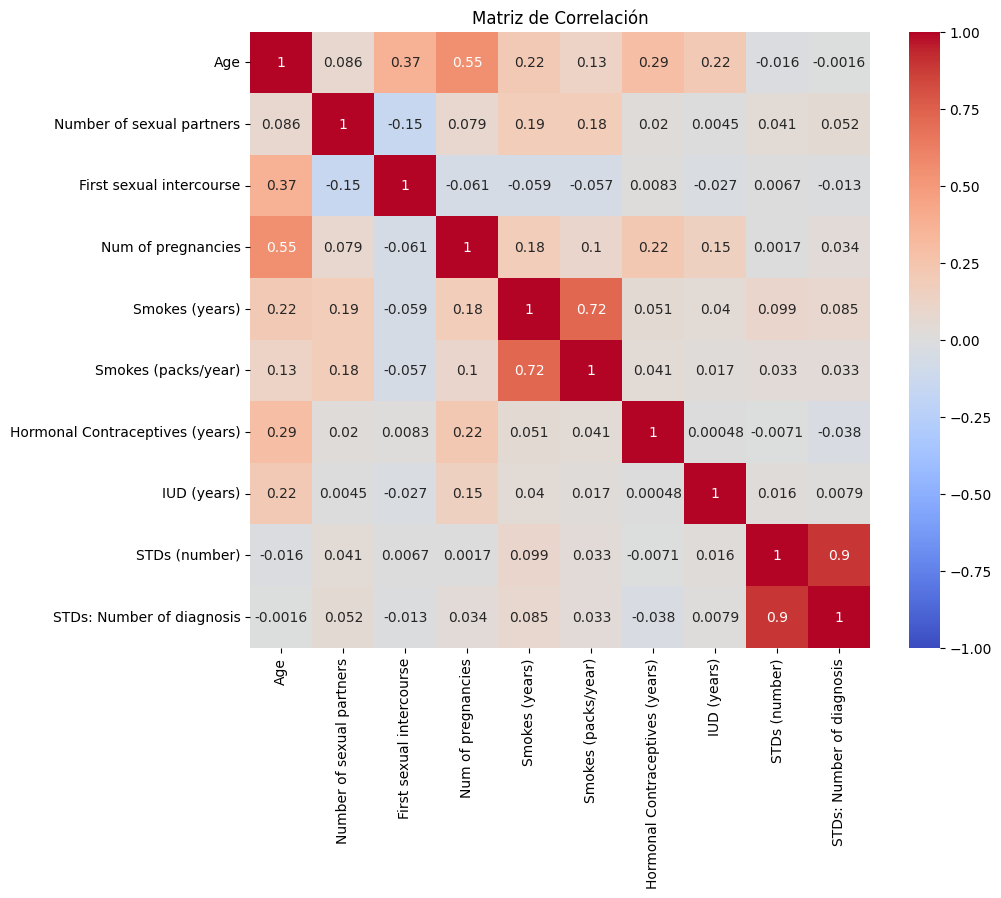

In [41]:
# Análisis de correlación
correlation_matrix = df[quantitative_vars].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

### Comentarios sobre la Matriz de Correlación

1. **Relaciones Fuertes Positivas:**
   - **STDs (number) y STDs: Number of diagnosis**: Estas variables tienen una correlación muy alta (0.897). Esto significa que el número de diagnósticos de ETS está muy relacionado con la cantidad de ETS que una persona ha tenido.

2. **Relaciones Moderadas Positivas:**
   - **Age y Num of pregnancies**: Hay una correlación moderada (0.548). A medida que las personas envejecen, es más probable que hayan tenido más embarazos.
   - **Smokes (years) y Smokes (packs/year)**: Tienen una correlación fuerte (0.724). Las personas que han fumado durante más años tienden a fumar más paquetes por año.
   - **Age y Hormonal Contraceptives (years)**: Existe una correlación moderada (0.289). Las mujeres mayores pueden haber usado anticonceptivos hormonales durante más tiempo.

3. **Relaciones Débiles Positivas:**
   - **Age y Smokes (years)**: Hay una correlación débil (0.218). A medida que aumenta la edad, también puede aumentar la cantidad de años que una persona ha fumado, aunque no de manera fuerte.
   - **Age y IUD (years)**: Tienen una correlación débil (0.216). La edad puede estar ligeramente relacionada con los años de uso del DIU.
   - **Smokes (years) y STDs (number)**: Hay una correlación positiva débil (0.098). Puede haber una ligera tendencia a que los fumadores tengan más diagnósticos de ETS.

4. **Relaciones Débiles Negativas:**
   - **First sexual intercourse (age) y Number of sexual partners**: Tienen una correlación negativa débil (-0.150). Aquellos que tienen su primera relación sexual a una edad más temprana pueden tener más parejas sexuales.
   - **First sexual intercourse (age) y Num of pregnancies**: La correlación es muy débil y negativa (-0.060), lo que sugiere una relación casi inexistente.

5. **Relaciones Muy Débiles o Inexistentes:**
   - Muchas variables muestran correlaciones cercanas a 0, indicando que no hay una relación significativa entre ellas. Por ejemplo, **STDs (number) y Age** (-0.016) no tienen una correlación significativa, lo cual sugiere que el número de ETS no está relacionado con la edad en este conjunto de datos.
   - **Hormonal Contraceptives (years) y IUD (years)** muestran una correlación casi nula (0.000483), lo cual es lógico ya que son métodos anticonceptivos alternativos y es poco probable que se usen juntos.

## 5. Utilice las variables categóricas, cree tablas de frecuencia, proporción, gráficas de barras o cualquier otra técnica que le permita explorar los datos

Hecho en análisis exploratorio

## 6. Determine el tratamiento a seguir con los valores faltantes. Explique si necesita remover alguna variable por la cantidad de valores faltantes que tiene. ¿Es factible eliminar todos los valores faltantes de todas las variables?

In [43]:
# Verificar la cantidad de NaN en cada columna antes de la eliminación
nan_counts_before = df.isna().sum()

# Número de filas antes de eliminar valores NaN
num_rows_before = len(df)

# Eliminar todas las filas con valores NaN
df_cleaned = df.dropna()

# Verificar la cantidad de NaN en cada columna después de la eliminación
nan_counts_after = df_cleaned.isna().sum()

# Número de filas después de eliminar valores NaN
num_rows_after = len(df_cleaned)

# Calcular el porcentaje de datos eliminados
percent_removed = 100 * (num_rows_before - num_rows_after) / num_rows_before

# Imprimir el resumen formateado
print("### Resumen de la Eliminación de Valores Faltantes")
print(f"- Número de filas antes de la eliminación: {num_rows_before}")
print(f"- Número de filas después de la eliminación: {num_rows_after}")
print(f"- Porcentaje de datos eliminados: {percent_removed:.2f}%")
print("\n### Cantidad de Valores Faltantes en cada Columna")
print(nan_counts_before)

### Resumen de la Eliminación de Valores Faltantes
- Número de filas antes de la eliminación: 858
- Número de filas después de la eliminación: 668
- Porcentaje de datos eliminados: 22.14%

### Cantidad de Valores Faltantes en cada Columna
Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:

## 7. Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA, ¿valdrá la pena?

Varianza Explicada por cada Componente Principal:
Componente Principal 1: 0.1421
Componente Principal 2: 0.1003

Varianza Total Explicada por los Componentes Seleccionados: 0.2424


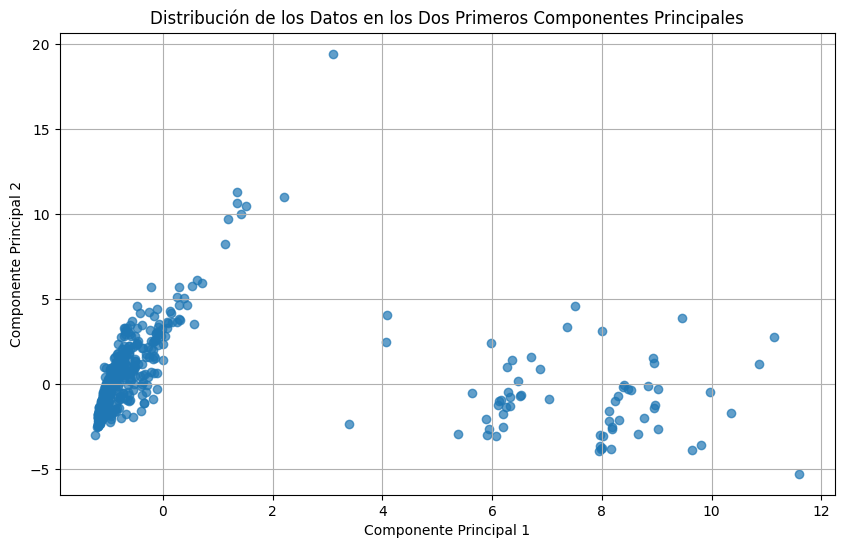

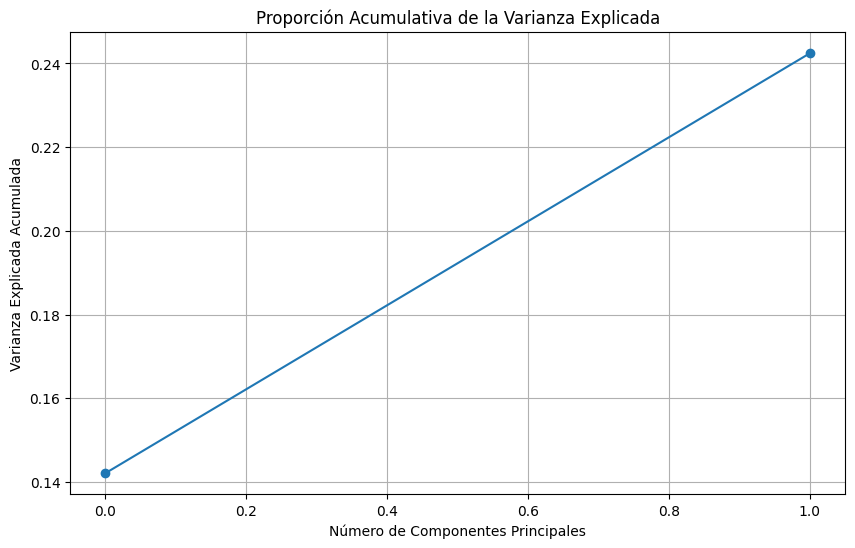

In [56]:

# Lista de variables categóricas
continuous_vars = ['Age', 'Number of sexual partners',
                   'First sexual intercourse',
                   'Num of pregnancies',
                   'Smokes (years)', 'Smokes (packs/year)',
                   'Hormonal Contraceptives (years)', 'IUD (years)']

# Ejemplo de DataFrame con datos continuos y codificados
data = df_cleaned.copy()
data_encoded = pd.get_dummies(data, columns=multi_class_vars)
data_continuous = data[continuous_vars]
data_combined = pd.concat([data_continuous, data_encoded], axis=1)

# Normalizar datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_combined)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_normalized)

# Crear DataFrame con los resultados del PCA
pca_df = pd.DataFrame(data=principal_components, columns=['Componente Principal 1', 'Componente Principal 2'])

# Varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza Explicada por cada Componente Principal:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Componente Principal {i + 1}: {ratio:.4f}")
total_variance_explained = sum(explained_variance_ratio)
print(f"\nVarianza Total Explicada por los Componentes Seleccionados: {total_variance_explained:.4f}")

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Componente Principal 1'], pca_df['Componente Principal 2'], alpha=0.7)
plt.title('Distribución de los Datos en los Dos Primeros Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# Proporción acumulativa de la varianza explicada
variance_explained = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(variance_explained, marker='o')
plt.title('Proporción Acumulativa de la Varianza Explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

### Evaluación de Transformaciones en Variables Categóricas para PCA

**Análisis de la Varianza Explicada:**

- **Varianza Explicada por Cada Componente Principal:**
  - **Componente Principal 1:** 0.1421
  - **Componente Principal 2:** 0.1003

- **Varianza Total Explicada por los Componentes Seleccionados:**
  - **Varianza Total:** 0.2424

**Evaluación de la Inclusión de Variables Categóricas:**

La varianza explicada por los dos primeros componentes principales es de aproximadamente 24.24%, lo que sugiere que estos componentes capturan una parte, pero no toda, de la variabilidad en los datos.

## Referencias
Fernandes,Kelwin, Cardoso,Jaime, and Fernandes,Jessica. (2017). Cervical Cancer (Risk Factors). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z310.

## Link a repositorio
[Laboratorio 1](https://github.com/jannisce/DataScience-Labs/tree/lab-1)